In [ ]:
#123B2F151
#Perform the following operations using Python on the Air  quality data sets a. Data cleaning b. Data transformation

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('C:/Users/prati.PRATIK.001/Desktop/FODS/Dataset/Air_Quality.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16218 entries, 0 to 16217
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       16218 non-null  int64  
 1   Indicator ID    16218 non-null  int64  
 2   Name            16218 non-null  object 
 3   Measure         16218 non-null  object 
 4   Measure Info    16218 non-null  object 
 5   Geo Type Name   16218 non-null  object 
 6   Geo Join ID     16218 non-null  int64  
 7   Geo Place Name  16218 non-null  object 
 8   Time Period     16218 non-null  object 
 9   Start_Date      16218 non-null  object 
 10  Data Value      16218 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.5+ MB


In [6]:
df.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30,NaN
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93,NaN
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09,NaN
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,01/01/2015,19.76,NaN
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/01/2008,22.83,NaN


In [7]:
df = df.drop(columns=['Message'])

In [8]:
df = df.drop_duplicates()

In [9]:
df['Data Value'] = df['Data Value'].fillna(df['Data Value'].mean())

In [23]:
df['Start_Date'] = pd.to_datetime(df['Start_Date'], errors='coerce')
df['Year'] = df['Start_Date'].dt.year
df['Month'] = df['Start_Date'].dt.month
df['Day'] = df['Start_Date'].dt.day
print("\nNew date features added: 'Year', 'Month', 'Day'")
df


New date features added: 'Year', 'Month', 'Day'


,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Year,Month,Day
0,172653,375,Nitrogen dioxide (NO2),Mean,6,UHF34,203,5,Annual Average 2011,2010-12-01,0.836404,2010,12,1
1,172585,375,Nitrogen dioxide (NO2),Mean,6,UHF34,203,5,Annual Average 2009,2008-12-01,1.000879,2008,12,1
2,336637,375,Nitrogen dioxide (NO2),Mean,6,UHF34,204,30,Annual Average 2015,2015-01-01,0.209784,2015,1,1
3,336622,375,Nitrogen dioxide (NO2),Mean,6,UHF34,103,38,Annual Average 2015,2015-01-01,0.277390,2015,1,1
4,172582,375,Nitrogen dioxide (NO2),Mean,6,UHF34,104,73,Annual Average 2009,2008-12-01,0.587169,2008,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16211,211560,375,Nitrogen dioxide (NO2),Mean,6,UHF34,205,96,Winter 2013-14,2013-12-01,1.076558,2013,12,1
16213,130750,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,7,UHF42,211,111,2005,2005-01-01,-1.403688,2005,1,1
16214,130780,647,Outdoor Air Toxics - Formaldehyde,Annual average concentration,7,Borough,5,94,2005,2005-01-01,-1.484412,2005,1,1
16215,131020,652,Cardiac and respiratory deaths due to Ozone,Estimated annual rate,2,UHF42,504,84,2005-2007,2005-01-01,-0.959706,2005,1,1



Outliers handled using IQR method.


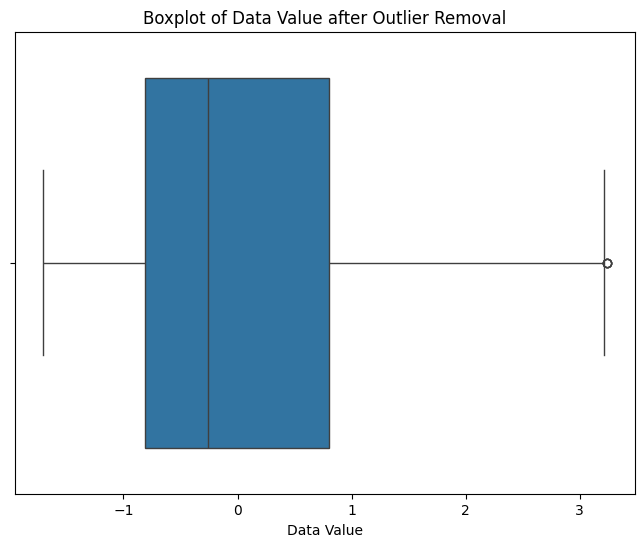

In [17]:
Q1 = df['Data Value'].quantile(0.25)
Q3 = df['Data Value'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Data Value'] >= (Q1 - 1.5 * IQR)) & (df['Data Value'] <= (Q3 + 1.5 * IQR))]
print("\nOutliers handled using IQR method.")

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Data Value')
plt.title("Boxplot of Data Value after Outlier Removal")
plt.xlabel("Data Value")
plt.show()


In [18]:
label_encoder_geo_place = LabelEncoder()
label_encoder_measure_info = LabelEncoder()
df['Geo Place Name'] = label_encoder_geo_place.fit_transform(df['Geo Place Name'])
df['Measure Info'] = label_encoder_measure_info.fit_transform(df['Measure Info'])

In [19]:
scaler = StandardScaler()
df[['Data Value']] = scaler.fit_transform(df[['Data Value']])

In [20]:
X = df.drop(columns=['Data Value'])  
y = df['Data Value']


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print(df.head())

X_train shape: (12529, 13)
X_test shape: (3133, 13)
y_train shape: (12529,)
y_test shape: (3133,)
   Unique ID  Indicator ID                    Name Measure  Measure Info  \
0     172653           375  Nitrogen dioxide (NO2)    Mean             6   
1     172585           375  Nitrogen dioxide (NO2)    Mean             6   
2     336637           375  Nitrogen dioxide (NO2)    Mean             6   
3     336622           375  Nitrogen dioxide (NO2)    Mean             6   
4     172582           375  Nitrogen dioxide (NO2)    Mean             6   

  Geo Type Name  Geo Join ID  Geo Place Name          Time Period Start_Date  \
0         UHF34          203               5  Annual Average 2011 2010-12-01   
1         UHF34          203               5  Annual Average 2009 2008-12-01   
2         UHF34          204              30  Annual Average 2015 2015-01-01   
3         UHF34          103              38  Annual Average 2015 2015-01-01   
4         UHF34          104              73 